# Nearest Neighbor Classifierwith SKLEARN
------------


## Pen-Based Recognition of Handwritten Digits Data Set 
---

[image01]: data_abstract.PNG

![Data] [image01]

## Import Dependencies

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

## Load Data

In [4]:
def load_data(file):
    return np.loadtxt(file)

## Build the KNN Class

In [5]:
class KNN(object):
    
    def __init__(self, train_data, test_data, k):
        self.train_data = train_data[:, :-1]
        self.train_label = train_data[:, -1]
        self.test_data = test_data[:, :-1]
        self.test_label = test_data[:, -1]
        self.k = k
        self.correct = 0
        self.model = None
        self.predictions = None
        self.acc = 0
        
    def normalize(self):
        mean = np.mean(self.train_data, axis=0)
        std_dev = np.std(self.train_data, axis=0)
        
        for i in range(0, self.train_data.shape[1]):
            self.train_data[:, i] = self.train_data[:, i] - mean[i]
            self.train_data[:, i] = self.train_data[:, i] / std_dev[i]
            self.test_data[:, i] = self.test_data[:, i] - mean[i]
            self.test_data[:, i] = self.test_data[:, i] / std_dev[i]
        
    def train(self):
        self.model = KNeighborsClassifier(n_neighbors = self.k)
        self.model.fit(self.train_data, self.train_label)
        
    def classify(self):
        self.predictions = self.model.predict(self.test_data)
        self.acc = self.model.score(self.test_data, self.test_label)
        
    def show_acc(self):
        print("when k =", self.k, "accuracy is", self.acc)

## Maine Function calls

In [6]:
k_value = 1
train_file = "pendigits_training.txt"
test_file = "pendigits_test.txt"
train = load_data(train_file)
test = load_data(test_file)

In [7]:
knn = KNN(train, test, k_value)
knn.normalize()
knn.train()
# knn.classify()
# knn.show_acc()



## Data - Pendigits.txt  16 Dimensional Data 
-----------------

[image01]: data.PNG

![Data] [image01]


## Perform TSNE for visualization

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [8]:
x = knn.train_data
y = knn.train_label

In [9]:
standard = StandardScaler()
x_std = standard.fit_transform(x)

In [10]:
tsne = TSNE(n_components = 2, random_state = 0)

In [11]:
x_test_2d = tsne.fit_transform(x_std)

In [12]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [13]:
markers = ("s", "d", "o", "^", "v", "8", "p", "_", "2", "s")

In [14]:
color_map = { 0:"red", 1:"blue", 2:"lightgreen", 3:"purple", 4:"cyan", 5:"black", 6:"yellow", 7:"magenta", 
             8:"plum", 9:"yellowgreen"  }

In [17]:
plt.figure()

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[ y == cl, 0], y = x_test_2d[ y == cl, 1], c = color_map[idx], marker = markers[idx])

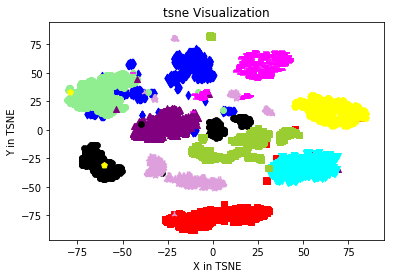

In [18]:

plt.xlabel("X in TSNE")
plt.ylabel("Y in TSNE")
plt.title("tsne Visualization")
plt.legend(loc = "upper left")
plt.show()

TSNE Results 
----------------------

[image01]: tsne.PNG

![Data] [image01]
